In [1]:
%load_ext autoreload
%autoreload 2
#this will reload all changed modules every time before executing a new line

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nanofilm.ndimage import imread
import MyPacket.mypacket as mp

In [3]:
path_test_map = './data_demo/Flakesearch_Graphene_20180214175340935_087.png'

In [4]:
flake = mp.loadmap_astroclean(path_test_map)

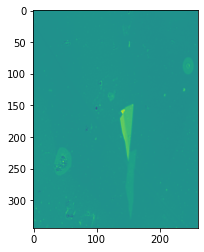

In [5]:
plt.imshow(flake, cmap='viridis');

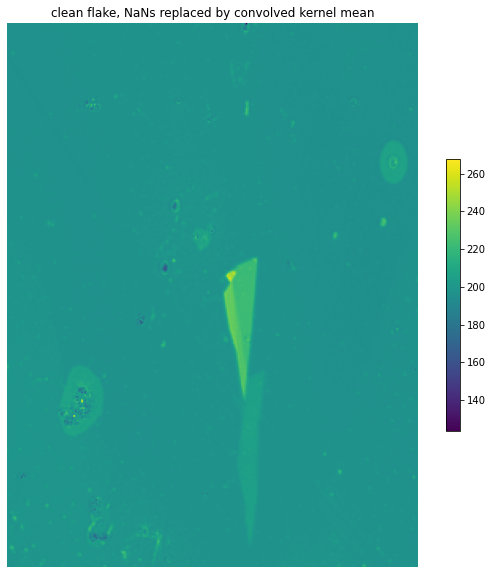

In [6]:
mp.plot_image_withCbar(flake, 'clean flake, NaNs replaced by convolved kernel mean');

In [7]:
flake.shape

(344, 260)

In [8]:
flakeReshaped = flake.reshape(flake.shape[0]*flake.shape[1], 1)

A single map is already a 2D array, but as it has only one channel (similar to a grayscale image), it needs to be reshaped to be a column, with the 1 as second parameter of the reshape.

In [9]:
flakeReshaped

array([[196.24716],
       [196.33598],
       [196.16315],
       ...,
       [197.86055],
       [197.19736],
       [196.33505]], dtype=float32)

In [10]:
from sklearn.cluster import KMeans

In [11]:
%%time
kmeans = KMeans(n_clusters=6, random_state=0).fit(flakeReshaped)
flakesegmented = kmeans.cluster_centers_[kmeans.labels_]


Wall time: 1.68 s


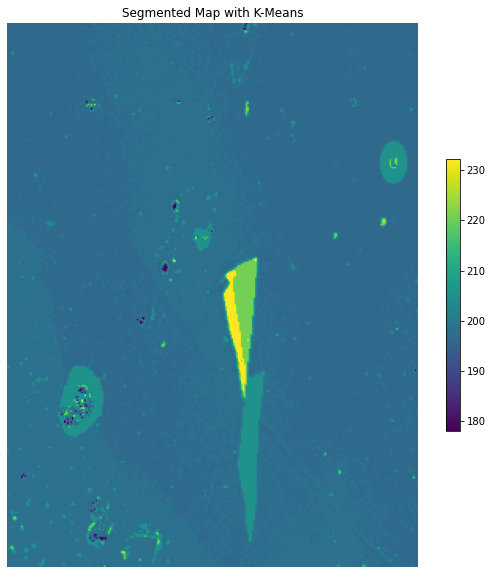

In [12]:
segmentedtoshow= flakesegmented.reshape(flake.shape[0], flake.shape[1])
mp.plot_image_withCbar(segmentedtoshow, 'Segmented Map with K-Means');

This seems to work fine :)

## Disadvantages and challenges:
   - application to a set of maps with dimension (rows, columns, [number of maps]
   - application to a set of combined delta and psi maps
   - the number of initial clusters must be set manually. Maybe this can be used as tunable parameter in the future front-end
   - loss of resolution on edges 

## To-Do:
   - ~~try Kmeans++~~ kmeans++ esta ya implementado dentro del kmeans normal
   - ~~try DBSCAN~~
   - ~~try segmentation by MeanShift~~ the result in the example looks awesome, but it can't be applied to our maps, since the imput image must be 8-bit 3 channel
   - apply canny (or other method) to detect edges in segmented image
   - ~~try also other example maps~~
   - explore how to get the metrics for the different number of clusters in the K-Means algorithm
    

### Clustering with DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=100).fit(flakeReshaped)
dbscansegmentedtoshow = (dbscan.labels_.reshape(flake.shape[0], flake.shape[1]))
mp.plot_image_withCbar(dbscansegmentedtoshow, 'Segmented Map with DBSCAN');

DBSCAN is much worse than K-Means for this task:
- We still have to tune 2 parameters: eps and min_samples
- It is way too slow (in the order of minutes) 
- The output needs to be converted to uint8 for it to be plotted in the right scale, for some reason
- On top of that the result of the segmentation is too bad. 
One paper in the literature found showed nice results using DBSCAN, while in other examples found in the web, DBSCAN had the worse performance of all compared segmentation algorithms. 

# Test on squared sample map

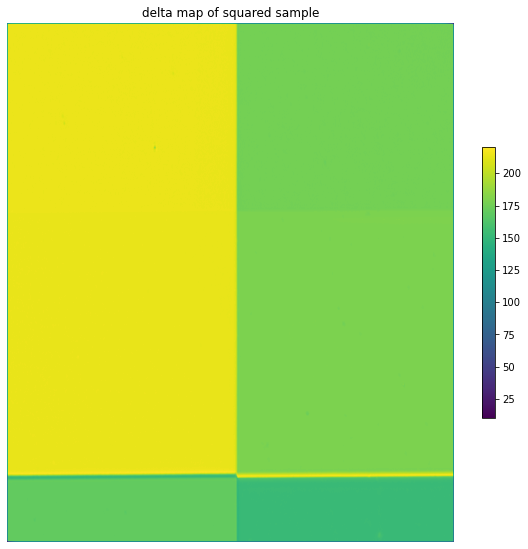

In [21]:
RCE_path = './data_demo/RCEvase/RCEvase_1zn_MapON_ScanON_AeON_FuE_2_Delta_0004.png'
delta = mp.loadmap_astroclean(RCE_path)
deltaTransposed = mp.loadmap_T_astroclean(RCE_path)
mp.plot_image_withCbar(deltaTransposed, 'delta map of squared sample')

In [14]:
deltaTReshaped = deltaTransposed.reshape(deltaTransposed.shape[0]*deltaTransposed.shape[1], 1)

In [19]:
kmeansD = KMeans(n_clusters=6, random_state=0).fit(deltaTReshaped)
deltaTSegmented = kmeansD.cluster_centers_[kmeansD.labels_]

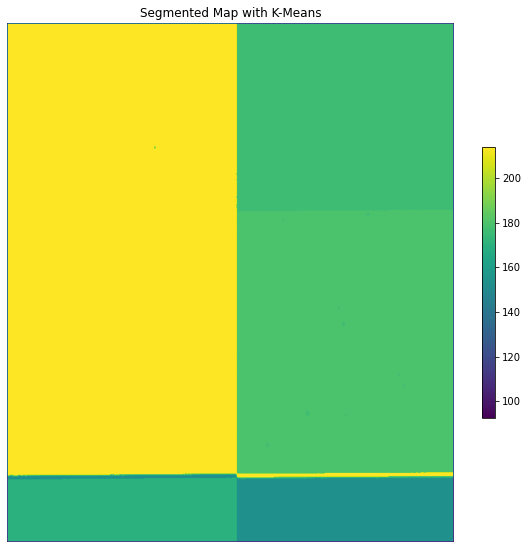

In [20]:
deltaTsegmentedtoshow = deltaTSegmented.reshape(deltaTransposed.shape[0], deltaTransposed.shape[1])
mp.plot_image_withCbar(deltaTsegmentedtoshow, 'Segmented Map with K-Means');